<a href="https://colab.research.google.com/github/sarnavadatta/Predictive-Modelling/blob/main/Credit_risk_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

Load the German Credit Data

In [64]:
# Load the German Credit Data
# The dataset doesn't have headers, so we'll define them manually.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    'checking_account_status', 'duration_months', 'credit_history', 'purpose',
    'credit_amount', 'savings_account', 'employment_since', 'installment_rate',
    'personal_status_sex', 'other_debtors_guarantors', 'present_residence_since',
    'property', 'age_years', 'other_installment_plans', 'housing',
    'number_existing_credits', 'job', 'number_dependents', 'telephone',
    'foreign_worker', 'credit_risk'
]
df = pd.read_csv(url, sep=' ', header=None, names=columns)

In [31]:
df

,checking_account_status,duration_months,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors_guarantors,...,property,age_years,other_installment_plans,housing,number_existing_credits,job,number_dependents,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


# Data Preprocessing
The dataset contains a mix of numerical and categorical features. We need to prepare this data for the model.

- Target Variable: The credit_risk column is our target. Its values are 1 (Good Credit) and 2 (Bad Credit). We'll map this to 0 (Bad) and 1 (Good) for clarity.
- Feature Separation: We'll split the data into features (X) and the target (y).
- Preprocessing Pipeline: We will scale numerical features and one-hot encode categorical features.

In [5]:
# Map 1 (Good) to 1 and 2 (Bad) to 0
df['credit_risk'] = df['credit_risk'].map({1: 1, 2: 0})

# Feature and Target Separation
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

# Identify Categorical and Numerical Features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create a Preprocessing Pipeline
# This scales numerical data and one-hot encodes categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Apply the transformations to our features
X_processed = preprocessor.fit_transform(X)

# Model Training
Now we'll split the data into training and testing sets and train our logistic regression model. Using **class_weight='balanced'** is important for imbalanced datasets like this, where defaults (bad credit) are less common.

In [6]:
# Train-Test Split
# Splitting the data into 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and Train the Model
# We use class_weight='balanced' to handle the imbalance in credit risk data
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

print("\nModel trained successfully!")


Model trained successfully!


# Model Evaluation
Evaluating the model is the most critical step. We need to see how well it performs on unseen test data. We'll check its accuracy, confusion matrix, and ROC-AUC score.

Accuracy and Classification Report

In [7]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Print a detailed classification report
# This shows precision, recall, and f1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad Credit (0)', 'Good Credit (1)']))


Model Accuracy: 0.6750

Classification Report:
                 precision    recall  f1-score   support

 Bad Credit (0)       0.47      0.70      0.56        60
Good Credit (1)       0.84      0.66      0.74       140

       accuracy                           0.68       200
      macro avg       0.65      0.68      0.65       200
   weighted avg       0.73      0.68      0.69       200



# Interpretation:

**Precision**: Of all the predictions for a class, how many were correct?

**Recall**: Of all the actual instances of a class, how many did the model correctly identify? In credit risk, the recall for "Bad Credit" is crucial because you want to catch as many potential defaulters as possible.

**F1-Score**: The harmonic mean of precision and recall.

# Confusion Matrix
The confusion matrix gives a clear picture of the model's performance, showing correct and incorrect predictions for each class.

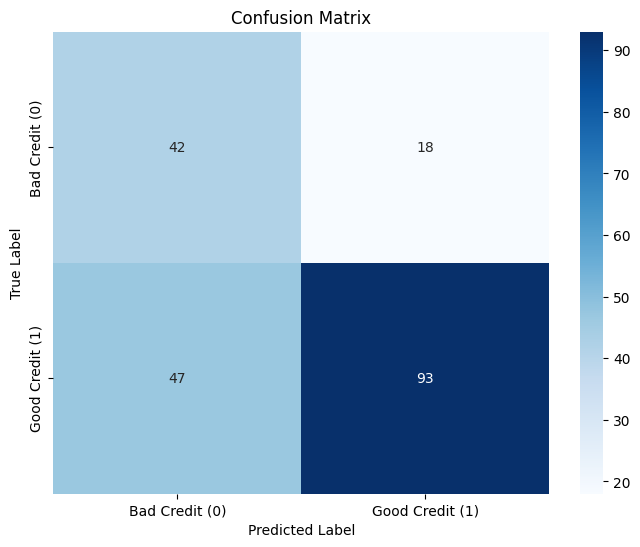

In [8]:
# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad Credit (0)', 'Good Credit (1)'],
            yticklabels=['Bad Credit (0)', 'Good Credit (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Interpretation:

**True Negatives (Top-Left)**: Correctly predicted "Bad Credit."

**False Positives (Top-Right)**: Incorrectly predicted "Good Credit" (a big
risk!).

**False Negatives (Bottom-Left)**: Incorrectly predicted "Bad Credit."

**True Positives (Bottom-Right)**: Correctly predicted "Good Credit."

**ROC Curve and AUC Score**
The Receiver Operating Characteristic (ROC) curve illustrates the model's ability to distinguish between the two classes. The Area Under the Curve (AUC) is a single score that summarizes this ability. A score closer to 1 is better.



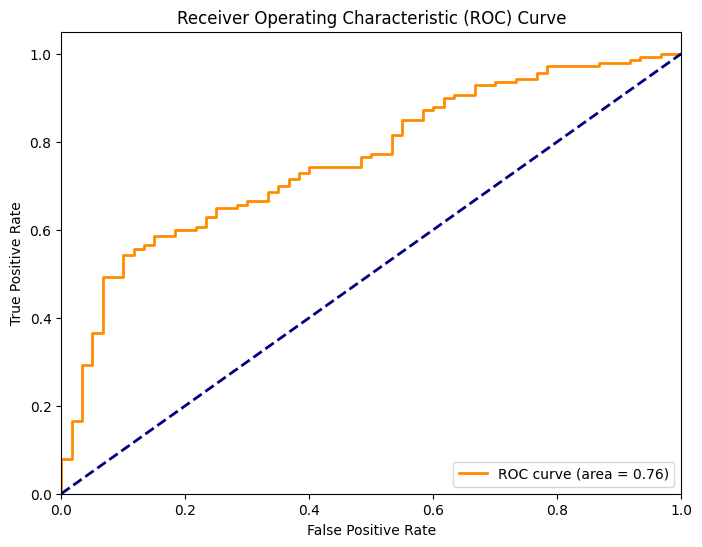


AUC Score: 0.7601


In [9]:
# Calculate probabilities for the positive class (Good Credit)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Dashed line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC Score: {auc_score:.4f}")

# XGBOOST

# Data Preprocessing & Train-Test Split
Before training the model, we need to clean and prepare the data. This involves converting the target variable into a binary format (0 and 1) and transforming categorical text features into a numerical format.

We'll split the data into a training set for teaching the model and a testing set for evaluating its performance on unseen data. Using *stratify* ensures that the proportion of good and bad credit is the same in both the training and testing sets, which is crucial for imbalanced datasets.



In [65]:
# Target Variable
# The original data uses 1 for 'Good' and 2 for 'Bad'.
# We will map this to the standard 1 for 'Good' and 0 for 'Bad'.
df['credit_risk'] = df['credit_risk'].map({1: 1, 2: 0})

# Drop rows with NaN in the target variable before splitting
df_cleaned = df.dropna(subset=['credit_risk'])
X = df_cleaned.drop('credit_risk', axis=1)
y = df_cleaned['credit_risk']

# Feature Preparation (One-Hot Encoding)
# XGBoost requires all input features to be numerical.
# We'll use pandas' get_dummies() to convert categorical columns into numerical ones.
X = pd.get_dummies(X, drop_first=True)
print("\nData preprocessed. Shape of features (X):", X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")



Data preprocessed. Shape of features (X): (1000, 48)

Training set size: 800 samples
Test set size: 200 samples


In [66]:
print("Training data count of 0={}, count of 1={}".format(sum(y_train==0), sum(y_train==1)))
print("Testing data count of 0={}, count of 1={}".format(sum(y_test==0), sum(y_test==1)))

Training data count of 0=240, count of 1=560
Testing data count of 0=60, count of 1=140


In [17]:
!pip install xgboost

In [35]:
import xgboost as xgb

# Initialize and Train the XGBoost Model
# We use scale_pos_weight to handle class imbalance
# Calculate the ratio of negative class to positive class
neg_pos_ratio = float(len(y_train[y_train == 0])) / len(y_train[y_train == 1])

model_xgb = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    random_state=42,
    scale_pos_weight=neg_pos_ratio # Handle class imbalance
)

model_xgb.fit(X_train, y_train.astype(int))

print("\nXGBoost model trained successfully!")


XGBoost model trained successfully!


Model Evaluation

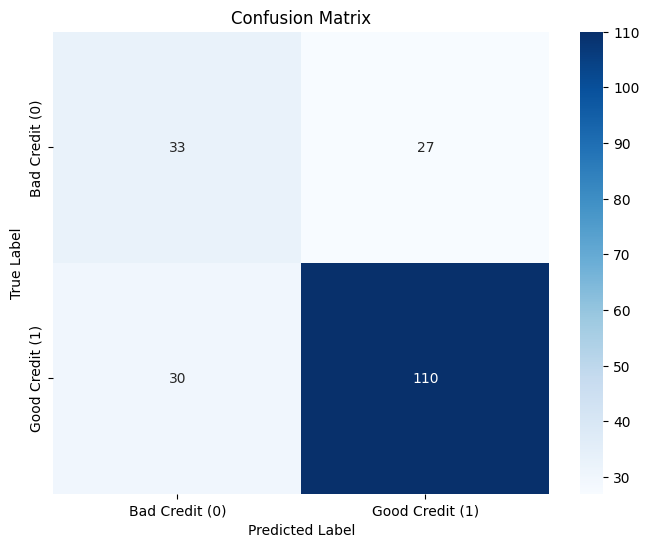

In [37]:
# Make predictions on the test data
y_pred = model_xgb.predict(X_test)

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Bad Credit (0)', 'Good Credit (1)'],
            yticklabels=['Bad Credit (0)', 'Good Credit (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad Credit (0)', 'Good Credit (1)']))


Classification Report:
                 precision    recall  f1-score   support

 Bad Credit (0)       0.52      0.55      0.54        60
Good Credit (1)       0.80      0.79      0.79       140

       accuracy                           0.71       200
      macro avg       0.66      0.67      0.67       200
   weighted avg       0.72      0.71      0.72       200



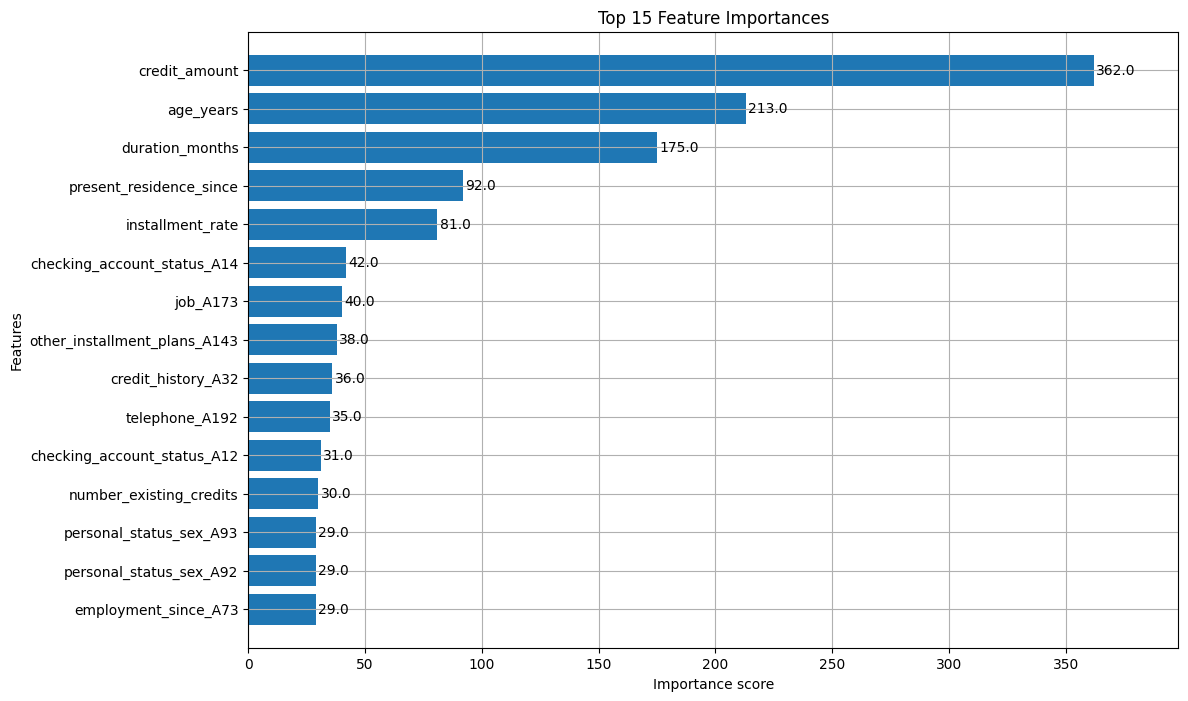

In [41]:
# Plot feature importance
fig, ax = plt.subplots(figsize=(12, 8))
xgb.plot_importance(model_xgb, ax=ax, max_num_features=15, height=0.8) # Corrected function call and model name
plt.title('Top 15 Feature Importances')
plt.show()

# Use SMOTE to handle imbalance

In [52]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = MinMaxScaler()
OHE_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
         ("OneHotEncoder", OHE_transformer, categorical_features),
          ("StandardScaler", numeric_transformer, numerical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['checking_account_status', 'credit_history', 'purpose',
       'savings_account', 'employment_since', 'personal_status_sex',
       'other_debtors_guarantors', 'property', 'other_installment_plans',
       'housing', 'job', 'telephone', 'foreign_worker'],
      dtype='object')),
                                ('StandardScaler', MinMaxScaler(),
                                 Index(['duration_months', 'credit_amount', 'installment_rate',
       'present_residence_since', 'age_years', 'number_existing_credits',
       'number_dependents'],
      dtype='object'))])

In [67]:
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training data count of 0={}, count of 1={}".format(sum(y_train==0), sum(y_train==1)))
print("Testing data count of 0={}, count of 1={}".format(sum(y_test==0), sum(y_test==1)))

## applying Trnsformation in training(fit_transform)
X_train=preprocessor.fit_transform(X_train)

## apply tansformation on test(transform)
X_test=preprocessor.transform(X_test)

Training data count of 0=240, count of 1=560
Testing data count of 0=60, count of 1=140


In [55]:
# Handling class imbalance with smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_resample, y_train_resample = sm.fit_resample(X_train, y_train)

len(X_train_resample), len(y_train_resample)

(1120, 1120)

In [57]:
# X_train_resample

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve


models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}

models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}

accuracy_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
rocauc_scores = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_resample, y_train_resample) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_resample)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train_resample, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train_resample, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train_resample, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train_resample, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train_resample, y_train_pred) # Calculate ROC score


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate ROC score

    accuracy_scores.append(model_test_accuracy)
    f1_scores.append(model_test_f1)
    precision_scores.append(model_test_precision)
    recall_scores.append(model_test_recall)
    rocauc_scores.append(model_test_rocauc_score)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8000
- F1 score: 0.7998
- Precision: 0.8182
- Recall: 0.7714
- Roc Auc Score: 0.8000
----------------------------------
Model performance for Test set
- Accuracy: 0.6850
- F1 score: 0.6962
- Precision: 0.8291
- Recall: 0.6929
- Roc Auc Score: 0.6798


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.6600
- F1 score: 0.6718
- Precision: 0.8051
- Recall: 0.6786
- Roc Auc Score: 0.6476


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7150
- F1 score: 0.7060
- Precision: 0.7748
- Recall: 0.8357
- Roc Auc Score: 0.6345


Gradient Boost
Model performance for Training se

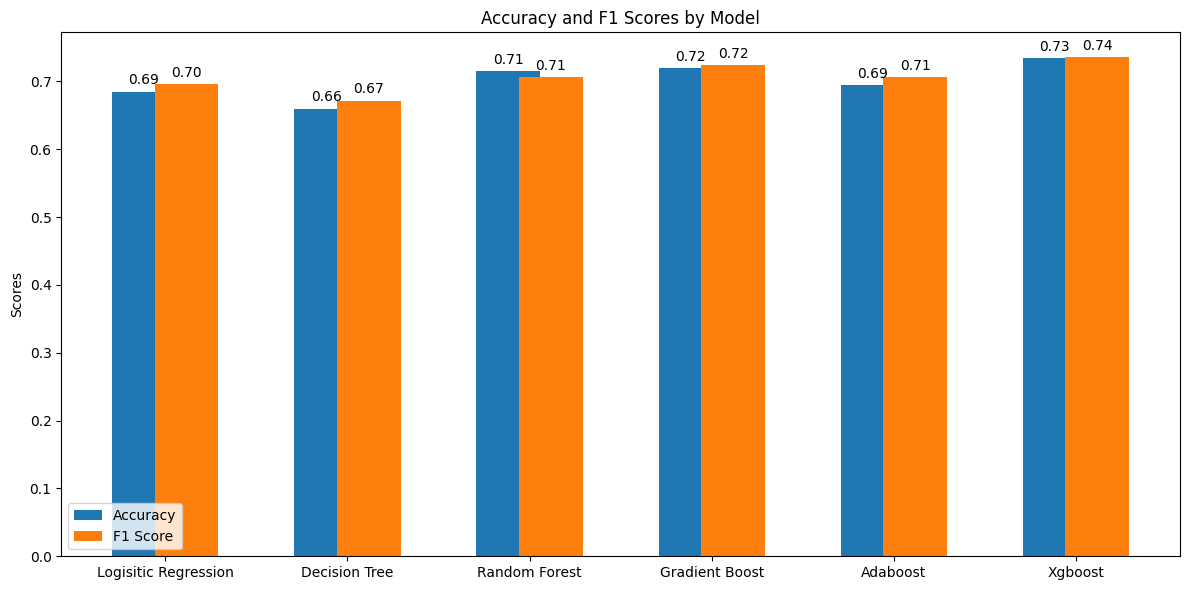

In [59]:
model_names = list(models.keys())

x = np.arange(len(model_names))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/3, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/3, f1_scores, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='{:.2f}')
ax.bar_label(rects2, padding=3, fmt='{:.2f}')

fig.tight_layout()

plt.show()

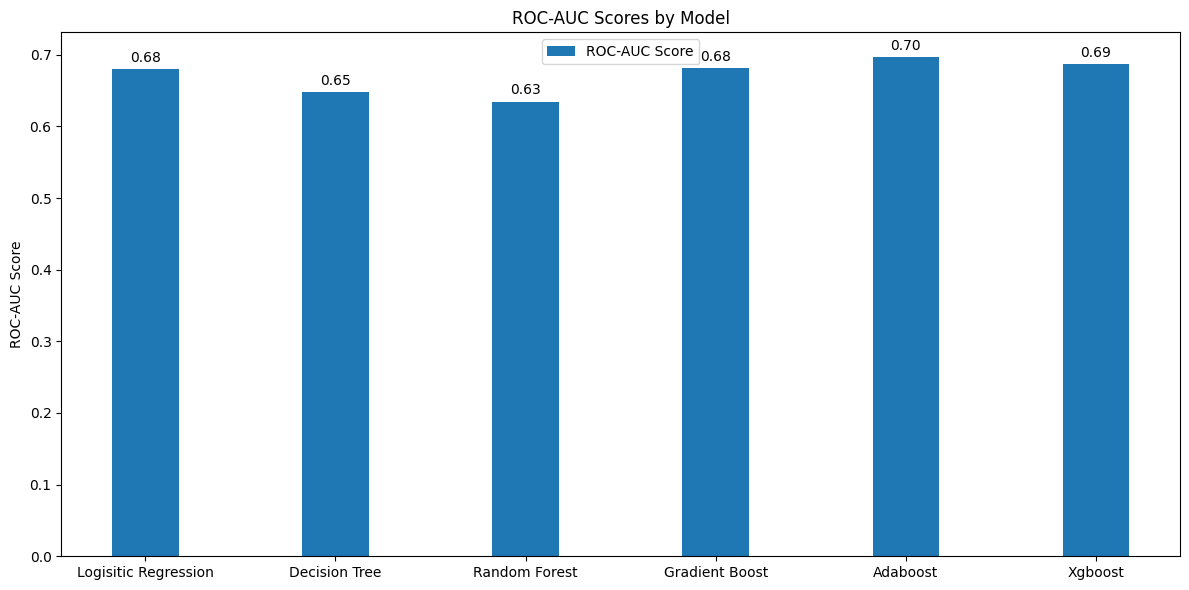

In [60]:
# Plot ROC-AUC scores
fig, ax = plt.subplots(figsize=(12, 6))
rects = ax.bar(model_names, rocauc_scores, width, label='ROC-AUC Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('ROC-AUC Score')
ax.set_title('ROC-AUC Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

ax.bar_label(rects, padding=3, fmt='{:.2f}')

fig.tight_layout()

plt.show()